In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')


In [3]:
iris = sns.load_dataset('iris')

iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
iris["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [4]:
X = iris.drop(columns='species')

In [5]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


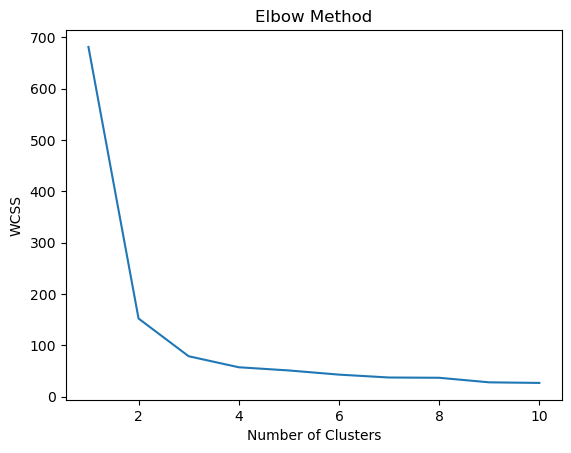

In [6]:
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the results
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [17]:
kmeans = KMeans(n_clusters=2)

iris['Cluster'] = kmeans.fit_predict(X)

In [18]:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,Cluster
14,5.8,4.0,1.2,0.2,setosa,1
31,5.4,3.4,1.5,0.4,setosa,1
21,5.1,3.7,1.5,0.4,setosa,1
127,6.1,3.0,4.9,1.8,virginica,0
15,5.7,4.4,1.5,0.4,setosa,1


In [19]:
!pip install plotly

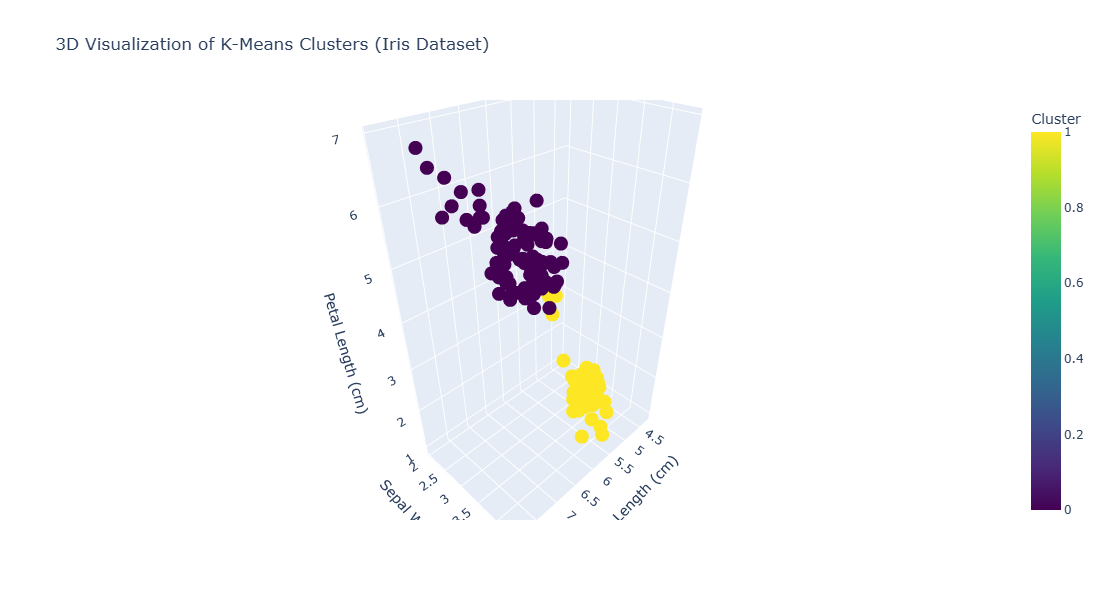

In [20]:
import plotly.express as px
import pandas as pd

# Create a Plotly figure
fig = px.scatter_3d(iris, 
                     x='sepal_length', 
                     y='sepal_width', 
                     z='petal_length', 
                     color='Cluster',
                     color_continuous_scale=px.colors.sequential.Viridis,
                     title='3D Visualization of K-Means Clusters (Iris Dataset)')

# Update layout to make the figure bigger
fig.update_layout(scene=dict(
                    xaxis_title='Sepal Length (cm)',
                    yaxis_title='Sepal Width (cm)',
                    zaxis_title='Petal Length (cm)',
                  ),
                  width=1000,  # Set the width of the plot
                  height=600)  # Set the height of the plot

# Show the plot
fig.show()


In [21]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.6810461692117465
